### Loading Libraries and Datasets

In [37]:
import pandas as pd

crimes = pd.read_csv('data/crime.csv')
education = pd.read_csv('data/education.csv')
population = pd.read_csv('data/population.csv')
visitors = pd.read_csv('data/visitors.csv')
census = pd.read_csv('data/population factors.csv')

### Cleaning and Combining the Datasets

In [39]:
# Removing the year 2021 as this is not included in the other datasets
crimes = crimes.loc[crimes['REF_DATE'] != 2021]

# Remove unwanted columns. I kept the 'GEO', 'REF_DATE', and 'VALUE' columns.
crimes = crimes[['GEO', 'REF_DATE', 'VALUE']]

# Group by 'GEO' and 'REF_DATE'. Here I summed together the values for each province for each year.
crimes_grouped = crimes.groupby(['GEO', 'REF_DATE'])['VALUE'].sum().reset_index()

# Clean 'GEO' names. Remove the number in brackets at the end of each province name.
crimes_grouped['GEO'] = crimes_grouped['GEO'].str.replace('\s*\[\d+\]', '', regex=True)

# Filter out unwanted rows. I removed the rows that contained the following value in the 'GEO' column.
crimes_grouped = crimes_grouped.loc[crimes_grouped['GEO'] != 'Canadian Forces Military Police']

# Rename columns. I renamed the columns to 'Province', 'Year', and 'Crimes'.
crimes_grouped = crimes_grouped.rename(columns={'VALUE': 'Crimes', 'GEO': 'Province', 'REF_DATE': 'Year'})

# Group Territories. I grouped the territories together and summed the values for each year.
territories = ['Northwest Territories', 'Nunavut', 'Yukon']
total_territories_crimes = crimes_grouped[crimes_grouped['Province'].isin(territories)].groupby('Year')['Crimes'].sum().reset_index()
total_territories_crimes['Province'] = 'Territories'

# Remove Territories from crimes_grouped and add total_territories_crimes to crimes_grouped.
crimes_grouped = pd.concat([crimes_grouped, total_territories_crimes], ignore_index=True)
crimes_grouped = crimes_grouped[~crimes_grouped['Province'].isin(territories)]

# Group Territories for the Population dataset
total_territories_population = population[population['Province'].isin(territories)].groupby('Year')['Population'].sum().reset_index()
total_territories_population['Province'] = 'Territories'

# Remove individual Territories from the Population dataset and add the grouped data
population = pd.concat([population, total_territories_population], ignore_index=True)
population = population[~population['Province'].isin(territories)]

# Group Territories for the Education dataset
total_territories_visitors = visitors[visitors['Province'].isin(territories)].groupby('Year')['Visitors'].sum().reset_index()
total_territories_visitors['Province'] = 'Territories'

# Remove individual Territories from the Education dataset and add the grouped data
visitors = pd.concat([visitors, total_territories_visitors], ignore_index=True)
visitors = visitors[~visitors['Province'].isin(territories)]

# Merge the datasets together
merged_df = crimes_grouped.merge(education, on=['Province', 'Year'], how='outer')

merged_df_2 = merged_df.merge(population, on=['Province', 'Year'], how='outer')

merged_df_3 = merged_df_2.merge(visitors, on=['Province', 'Year'], how='outer')

final_merge = merged_df_3.merge(census, on=['Province', 'Year'], how='outer')

final_merge

,Province,Year,Crimes,Registrants,Population,Visitors,Births,Deaths,Immigrants,Emigrants,Returning Emigrants,Net Temporary Migration,Net Interprovincial Migration,Net non-permanent residents
0,Alberta,2017,1005325.43,194010,4258195,2215382,52986,26107,38697,6565,5000,2271,-3247,-1318
1,Alberta,2018,1043221.45,200391,4317665,2385856,52323,25751,40732,6570,4873,2302,-2032,3028
2,Alberta,2019,1071487.39,203823,4384848,1988895,50767,27123,35471,4684,3852,2089,-2377,289
3,Alberta,2020,933926.17,203523,4421857,378321,49152,30271,24007,4986,4355,1566,-9458,-4142
4,British Columbia,2017,838288.24,286914,4956550,8759579,44308,38128,41916,10994,6062,5358,13989,29297
5,British Columbia,2018,852692.63,295320,5040353,9376652,43433,38554,43135,9452,6061,5437,13325,31809
6,British Columbia,2019,949793.36,297432,5130780,8760281,43104,39161,44805,6918,5778,4930,16999,1022
7,British Columbia,2020,871957.23,287523,5151920,1677587,42844,42708,34388,7189,5418,3699,25376,-7547
8,Manitoba,2017,361011.29,62802,1340565,448291,17317,11121,14160,1468,1079,356,-7148,5572
9,Manitoba,2018,361049.00,63363,1357968,496719,16804,10938,15915,1194,1194,363,-7351,3062


### Normalized Columns

In [40]:
cols_to_normalize = [
    'Crimes', 'Registrants', 'Visitors', 'Births', 'Deaths', 'Immigrants', 
    'Emigrants', 'Returning Emigrants', 'Net Temporary Migration', 
    'Net Interprovincial Migration', 'Net non-permanent residents'
]

for col in cols_to_normalize:
    final_merge[f'normalized {col}'] = final_merge[col] / final_merge['Population']

final_merge.drop(cols_to_normalize, axis=1, inplace=True)
final_merge.drop('Population', axis=1, inplace=True)

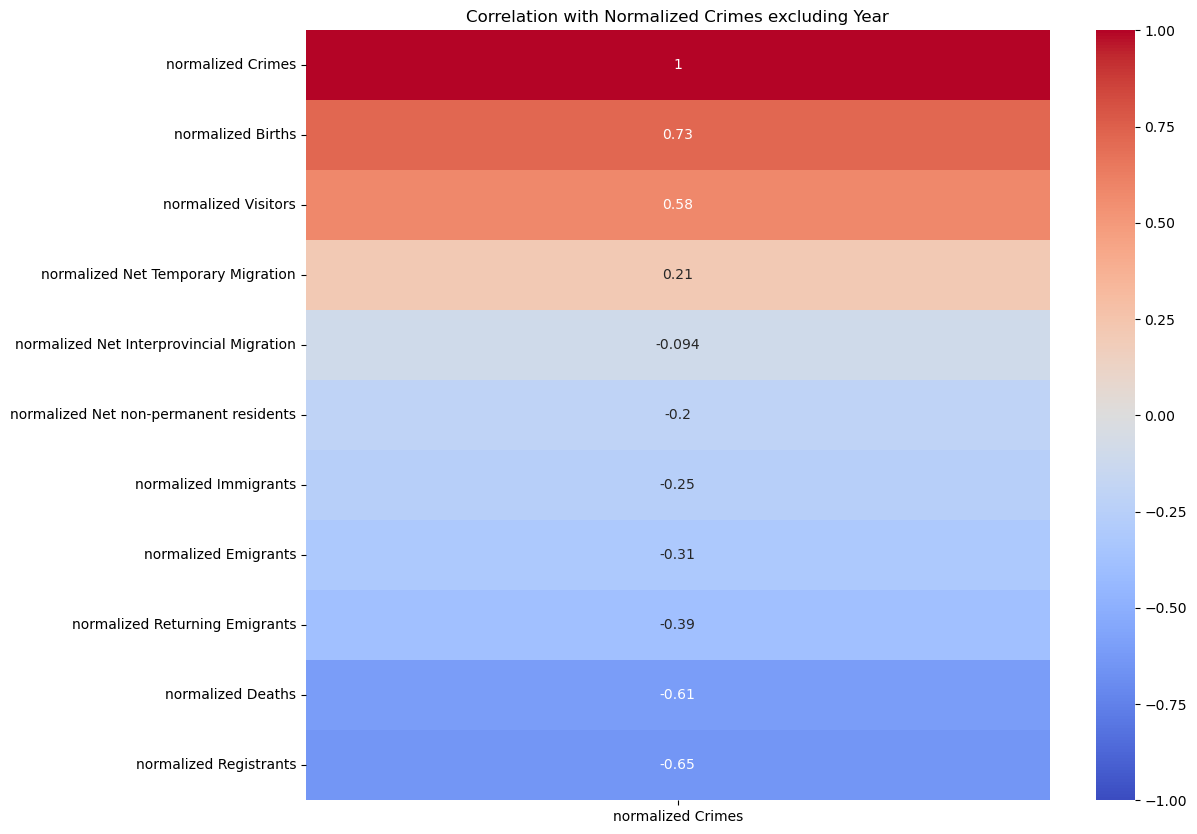

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named final_merge
numeric_cols = [col for col in final_merge.columns if final_merge[col].dtype in ['int64', 'float64']]

# Exclude the "Year" column
numeric_cols.remove('Year')

# Filter only numeric columns
numeric_df = final_merge[numeric_cols]

# Compute correlations
correlations = numeric_df.corr()
crime_correlations = correlations[['normalized Crimes']]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(crime_correlations.sort_values(by="normalized Crimes", ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with Normalized Crimes excluding Year")
plt.show()


In [49]:
# Choosing a subset of columns for clarity
cols_to_plot = ['Crimes', 'Births', 'Deaths', 'Immigrants']

sns.pairplot(final_merge[cols_to_plot])
plt.suptitle('Pairwise plots of selected variables', y=1.02)
plt.show()


KeyError: "None of [Index(['Crimes', 'Births', 'Deaths', 'Immigrants'], dtype='object')] are in the [columns]"